# Project 1 - Mercedes-Benz Greener Manufacturing

## Following actions should be performed:

## 1)If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
## 2)Check for null and unique values for test and train sets.
## 3)Apply label encoder.
## 4)Perform dimensionality reduction.
## 5)Predict your test_df values using XGBoost.

## IMPORTS

In [81]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
import re
import scipy as sp

## READING THE CSV FILES

In [82]:
train_df=pd.read_csv(r"train.csv",nrows=200)
test_df=pd.read_csv(r"test.csv")
print (train_df.shape)
print (train_df.columns)
print (test_df.shape)
print (test_df.columns)

(200, 378)
Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)
(4209, 377)
Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)


In [83]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 590.7+ KB


In [84]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [85]:
train_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.0,200.000000,200.0
mean,213.865000,100.323950,0.010000,0.0,0.060000,0.085000,0.445000,0.0,0.005000,0.015000,...,0.270000,0.060000,0.345000,0.015000,0.0,0.010000,0.015000,0.0,0.005000,0.0
std,117.959523,11.807215,0.099748,0.0,0.238083,0.279582,0.498213,0.0,0.070711,0.121857,...,0.445074,0.238083,0.476561,0.121857,0.0,0.099748,0.121857,0.0,0.070711,0.0
min,0.000000,73.700000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
25%,122.750000,90.962500,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
50%,213.500000,98.205000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
75%,319.250000,108.847500,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
max,407.000000,139.200000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0


## 1)Checking for null Values

In [86]:
train_df.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [87]:
train_df.dropna(inplace=True)
print(train_df.isnull().sum())

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64


In [88]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


## 2)Feature Selection

In [89]:
cols = [c for c in train_df.columns if 'X' in c]
print('Number of features: {}'.format(len(cols)))

print('Feature types:')
train_df[cols].dtypes.value_counts()

Number of features: 376
Feature types:


int64     368
object      8
dtype: int64

In [90]:
counts = [[], [], []]
for c in cols:
    typ = train_df[c].dtype
    uniq = len(np.unique(train_df[c]))
    if uniq == 1: counts[0].append(c)
    elif uniq == 2 and typ == np.int64: counts[1].append(c)
    else: counts[2].append(c)

print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))

print('Constant features:', counts[0])
print('Categorical features:', counts[2])

Constant features: 95 Binary features: 274 Categorical features: 7

Constant features: ['X4', 'X11', 'X15', 'X33', 'X36', 'X38', 'X39', 'X40', 'X42', 'X53', 'X59', 'X60', 'X63', 'X74', 'X78', 'X83', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X99', 'X102', 'X105', 'X107', 'X110', 'X122', 'X123', 'X124', 'X145', 'X153', 'X160', 'X167', 'X190', 'X192', 'X200', 'X207', 'X210', 'X214', 'X217', 'X233', 'X235', 'X236', 'X239', 'X242', 'X243', 'X245', 'X248', 'X249', 'X253', 'X257', 'X259', 'X260', 'X268', 'X269', 'X270', 'X271', 'X277', 'X278', 'X280', 'X281', 'X282', 'X288', 'X289', 'X290', 'X293', 'X295', 'X296', 'X297', 'X298', 'X299', 'X301', 'X307', 'X310', 'X312', 'X318', 'X319', 'X320', 'X330', 'X332', 'X338', 'X339', 'X345', 'X347', 'X357', 'X369', 'X370', 'X379', 'X383', 'X385']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8']


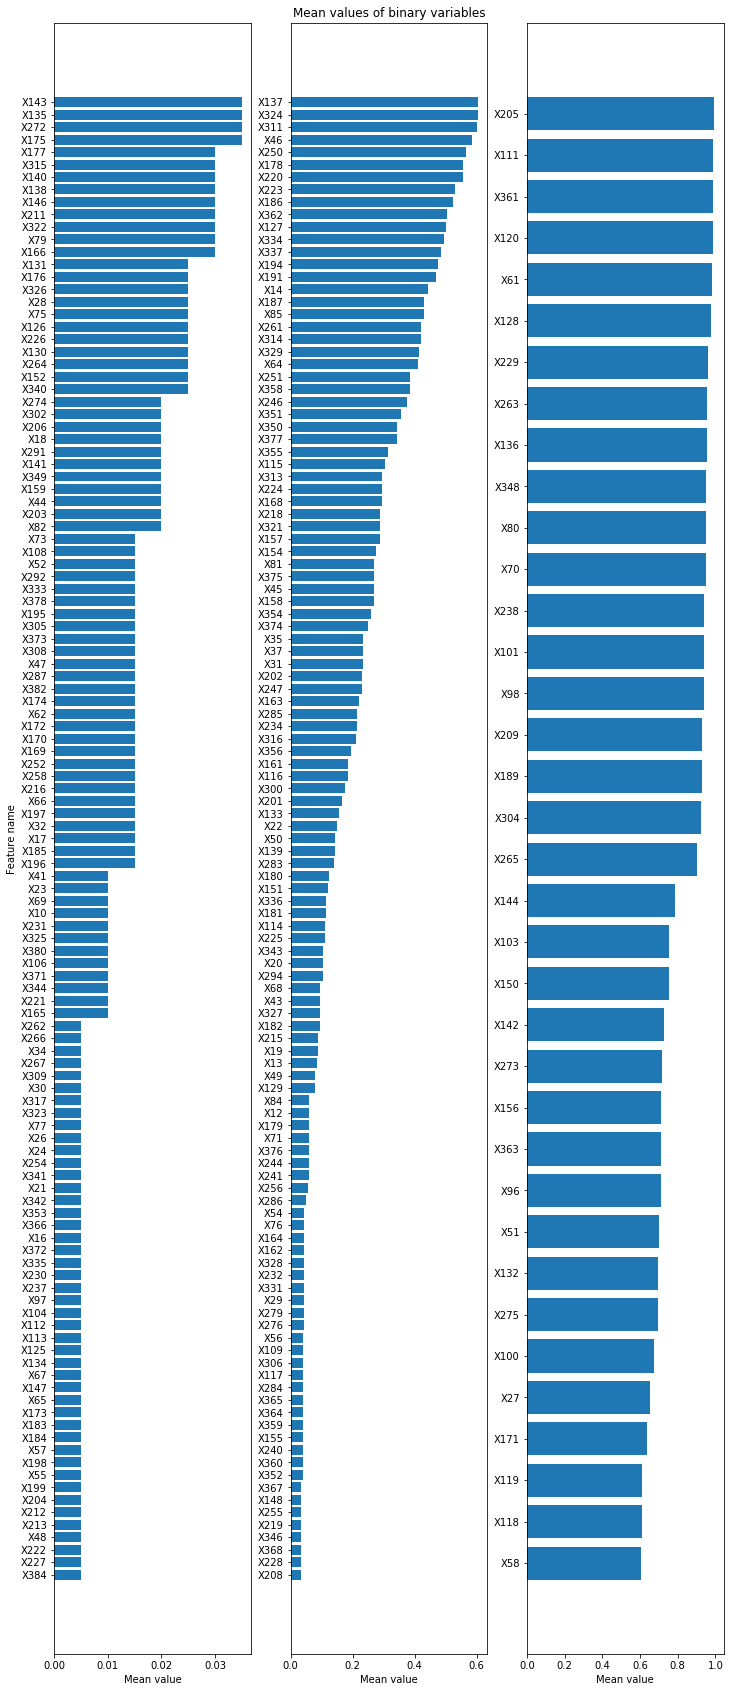

In [91]:
binary_means = [np.mean(train_df[c]) for c in counts[1]]
binary_names = np.array(counts[1])[np.argsort(binary_means)]
binary_means = np.sort(binary_means)

fig, ax = plt.subplots(1, 3, figsize=(12,30))
ax[0].set_ylabel('Feature name')
ax[1].set_title('Mean values of binary variables')
for i in range(3):
    names, means = binary_names[i*119:(i+1)*119], binary_means[i*119:(i+1)*119]
    ax[i].barh(range(len(means)), means, )
    ax[i].set_xlabel('Mean value')
    ax[i].set_yticks(range(len(means)))
    ax[i].set_yticklabels(names, rotation='horizontal')
plt.show()

## 3)Label Encoding

In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [93]:
for c in train_df.columns:
    if train_df[c].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train_df[c].values) + list(test_df[c].values)) 
        train_df[c] = lbl.transform(list(train_df[c].values))
        test_df[c] = lbl.transform(list(test_df[c].values))


In [94]:
print('Shape train: {}\nShape test: {}'.format(train_df.shape, test_df.shape))

Shape train: (200, 378)
Shape test: (4209, 377)


## 4)Dimensionality reduction.

In [107]:
from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.cluster import FeatureAgglomeration

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score

In [109]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# removing the outlier
train = train.loc[train['y'] < 170, :]

# seperating label and features
y_train = train['y']
train = train.drop('y', axis=1)

# label encoding the categorical features for dimension reduction
for c in train.columns:
    if train[c].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(train[c].values) + list(test[c].values))
        train[c] = lbl.transform(list(train[c].values))
        test[c] = lbl.transform(list(test[c].values))

In [110]:
n_comp = 12

# tSVD
tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
tsvd_results_train = tsvd.fit_transform(train)
tsvd_results_test = tsvd.transform(test)

# PCA
pca = PCA(n_components=n_comp, random_state=420)
pca2_results_train = pca.fit_transform(train)
pca2_results_test = pca.transform(test)

# ICA
ica = FastICA(n_components=n_comp, random_state=420)
ica2_results_train = ica.fit_transform(train)
ica2_results_test = ica.transform(test)

# GRP
grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
grp_results_train = grp.fit_transform(train)
grp_results_test = grp.transform(test)

# SRP
srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
srp_results_train = srp.fit_transform(train)
srp_results_test = srp.transform(test)

# NMF
nmf = NMF(n_components=n_comp, init='nndsvdar', random_state=420)
nmf_results_train = nmf.fit_transform(train)
nmf_results_test = nmf.transform(test)

# FAG
fag = FeatureAgglomeration(n_clusters=n_comp, linkage='ward')
fag_results_train = fag.fit_transform(train)
fag_results_test = fag.transform(test)

### Filtering the most significant components and inserting in a Dataframe

In [111]:
dim_reds = list()
train_pca = pd.DataFrame()
test_pca = pd.DataFrame()

train_ica = pd.DataFrame()
test_ica = pd.DataFrame()

train_tsvd = pd.DataFrame()
test_tsvd = pd.DataFrame()

train_grp = pd.DataFrame()
test_grp = pd.DataFrame()

train_srp = pd.DataFrame()
test_srp = pd.DataFrame()

train_nmf = pd.DataFrame()
test_nmf = pd.DataFrame()

train_fag = pd.DataFrame()
test_fag = pd.DataFrame()


for i in range(1, n_comp + 1):
    train_pca['pca_' + str(i)] = pca2_results_train[:, i - 1]
    test_pca['pca_' + str(i)] = pca2_results_test[:, i - 1]

    train_ica['ica_' + str(i)] = ica2_results_train[:, i - 1]
    test_ica['ica_' + str(i)] = ica2_results_test[:, i - 1]

    train_tsvd['tsvd_' + str(i)] = tsvd_results_train[:, i - 1]
    test_tsvd['tsvd_' + str(i)] = tsvd_results_test[:, i - 1]

    train_grp['grp_' + str(i)] = grp_results_train[:, i - 1]
    test_grp['grp_' + str(i)] = grp_results_test[:, i - 1]

    train_srp['srp_' + str(i)] = srp_results_train[:, i - 1]
    test_srp['srp_' + str(i)] = srp_results_test[:, i - 1]
    
    train_nmf['nmf_' + str(i)] = nmf_results_train[:, i - 1]
    test_nmf['nmf_' + str(i)] = nmf_results_test[:, i - 1]
    
    train_fag['fag_' + str(i)] = fag_results_train[:, i - 1]
    test_fag['fag_' + str(i)] = fag_results_test[:, i - 1]
    
dim_reds.append(('pca', train_pca, test_pca))
dim_reds.append(('ica', train_ica, test_ica))
dim_reds.append(('tsvd', train_tsvd, test_tsvd))
dim_reds.append(('grp', train_grp, test_grp))
dim_reds.append(('srp', train_srp, test_srp))
dim_reds.append(('nmf', train_nmf, test_nmf))
dim_reds.append(('fag', train_fag, test_fag))

## 5)XG Boost 

### Train test split

In [95]:
from sklearn.decomposition import PCA, FastICA
from sklearn.decomposition import TruncatedSVD
n_comp = 12

In [96]:
tsvd = TruncatedSVD(n_components=n_comp, random_state=42)
tsvd_results_train = tsvd.fit_transform(train_df.drop(["y"], axis=1))
tsvd_results_test = tsvd.transform(test_df)

In [97]:
pca = PCA(n_components=n_comp, random_state=42)
pca2_results_train = pca.fit_transform(train_df.drop(["y"], axis=1))
pca2_results_test = pca.transform(test_df)


In [98]:
ica = FastICA(n_components=n_comp, random_state=42)
ica2_results_train = ica.fit_transform(train_df.drop(["y"], axis=1))
ica2_results_test = ica.transform(test_df)

In [99]:
for i in range(1, n_comp+1):
    train_df['pca_' + str(i)] = pca2_results_train[:,i-1]
    test_df['pca_' + str(i)] = pca2_results_test[:, i-1]
    
    train_df['ica_' + str(i)] = ica2_results_train[:,i-1]
    test_df['ica_' + str(i)] = ica2_results_test[:, i-1]

In [100]:
y_train = train_df["y"]
y_mean = np.mean(y_train)

In [101]:
import xgboost as xgb

In [102]:
xgb_params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': y_mean, # base prediction = mean(target)
    'silent': 1
}

In [103]:
dtrain = xgb.DMatrix(train_df.drop('y', axis=1), y_train)
dtest = xgb.DMatrix(test_df)


In [104]:
num_boost_rounds = 1500
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)


[22:24:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[22:24:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { n_trees, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [105]:
from sklearn.metrics import r2_score
print(r2_score(model.predict(dtrain), dtrain.get_label()))

0.9670665251548802


In [106]:
from sklearn.metrics import r2_score
print(r2_score(model.predict(dtrain), dtrain.get_label()))

0.9670665251548802
